<a href="https://colab.research.google.com/github/PrachiSolanki1418/Deep_Learning_Projects/blob/main/Handdigit_Classification_Pytorch(Solanki_Prachi_DS_sem_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name : Solanki Prachi Piyushbhai**

**Data Science (Sem-7)**



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
# Define a simple neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 20)
        self.fc2 = nn.Linear(20, 15)
        self.fc3 = nn.Linear(15, 10)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
# Load the MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 83300363.54it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 33279036.76it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21613781.65it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7917925.51it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
# Initialize the network, loss function, and optimizer
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [5]:
# Training the network
for epoch in range(80):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.view(-1, 28*28)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

Epoch 1, Loss: 0.4881259528279305
Epoch 2, Loss: 0.2866518040796121
Epoch 3, Loss: 0.24676582822601
Epoch 4, Loss: 0.22656327132980028
Epoch 5, Loss: 0.21211778912792603
Epoch 6, Loss: 0.1980972583954533
Epoch 7, Loss: 0.19208941134611765
Epoch 8, Loss: 0.18298843115766844
Epoch 9, Loss: 0.17903279991696278
Epoch 10, Loss: 0.1725505759899815
Epoch 11, Loss: 0.17093382293706139
Epoch 12, Loss: 0.16606816767503818
Epoch 13, Loss: 0.16289891237094997
Epoch 14, Loss: 0.1591870878763497
Epoch 15, Loss: 0.15818723204533258
Epoch 16, Loss: 0.15505711799214283
Epoch 17, Loss: 0.15216231581916412
Epoch 18, Loss: 0.15049359897747636
Epoch 19, Loss: 0.1494371186643839
Epoch 20, Loss: 0.14694396191736062
Epoch 21, Loss: 0.14456235745027662
Epoch 22, Loss: 0.1437476495658358
Epoch 23, Loss: 0.1416714801033338
Epoch 24, Loss: 0.1420778324574232
Epoch 25, Loss: 0.13873898626094064
Epoch 26, Loss: 0.1370571283278366
Epoch 27, Loss: 0.1381099413002531
Epoch 28, Loss: 0.13496633409832914
Epoch 29, Loss:

In [6]:
correct = 0
total = 0
y_pred = []

with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.view(-1, 28*28)
        outputs = net(images)
        predicted = torch.max(outputs.data, 1)[1]  # Extract the tensor indices
        y_pred.extend(predicted)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct / total:.2f}%')

Accuracy of the network on the test images: 95.28%


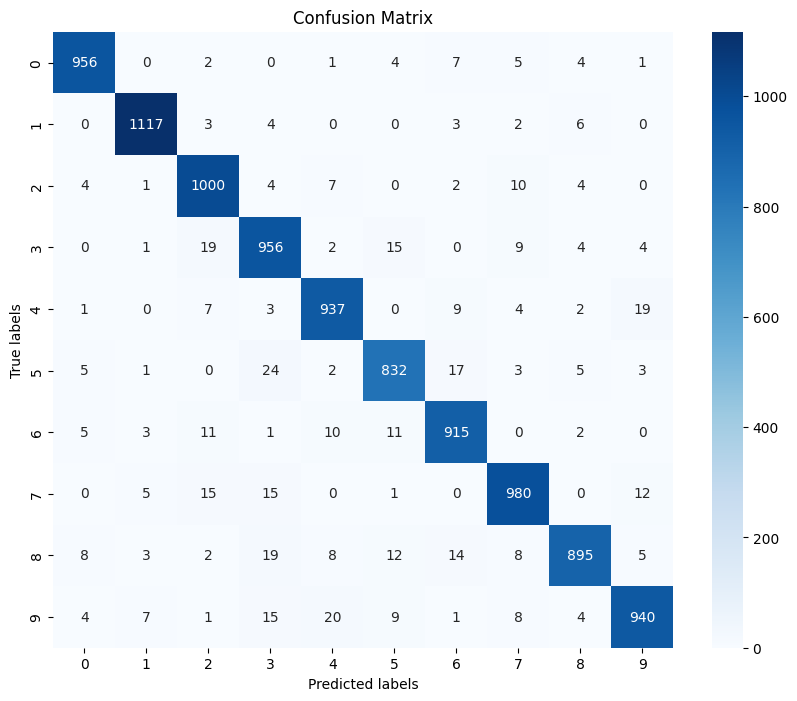

In [7]:
# Creating and plotting the confusion matrix
conf_matrix = confusion_matrix(testset.targets, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()